In [1]:
# call data.fif
import mne
import numpy as np

raw = mne.io.read_raw_fif('data2.fif', preload=True)


Opening raw data file data2.fif...
    Range : 0 ... 101003 =      0.000 ...   202.006 secs
Ready.
Reading 0 ... 101003  =      0.000 ...   202.006 secs...


C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_36560\851441222.py:5: RuntimeWarning: This filename (data2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('data2.fif', preload=True)


In [2]:
print(raw.info)

<Info | 10 non-empty values
 bads: []
 ch_names: C1, C2, C3, C4
 chs: 4 EEG
 custom_ref_applied: False
 dig: 7 items (3 Cardinal, 4 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 4
 projs: []
 sfreq: 500.0 Hz
>


In [3]:
print(raw.ch_names)

['C1', 'C2', 'C3', 'C4']


In [4]:
raw.annotations

<Annotations | 208 segments: BAD boundary (4), EDGE boundary (4), fist ...>

In [5]:
events, events_id = mne.events_from_annotations(raw)
print(events_id)

Used Annotations descriptions: ['fist', 'hook', 'index', 'open', 'thumb']
{'fist': 1, 'hook': 2, 'index': 3, 'open': 4, 'thumb': 5}


In [6]:
print(events)

[[     0      0      1]
 [   500      0      1]
 [  1000      0      1]
 [  1500      0      1]
 [  2000      0      1]
 [  2500      0      1]
 [  3000      0      1]
 [  3500      0      1]
 [  4000      0      1]
 [  4500      0      1]
 [  5000      0      1]
 [  5500      0      1]
 [  6000      0      1]
 [  6500      0      1]
 [  7000      0      1]
 [  7500      0      1]
 [  8000      0      1]
 [  8500      0      1]
 [  9000      0      1]
 [  9500      0      1]
 [ 10000      0      1]
 [ 10500      0      1]
 [ 11000      0      1]
 [ 11500      0      1]
 [ 12000      0      1]
 [ 12500      0      1]
 [ 13000      0      1]
 [ 13500      0      1]
 [ 14000      0      1]
 [ 14500      0      1]
 [ 15000      0      1]
 [ 15500      0      1]
 [ 16000      0      1]
 [ 16500      0      1]
 [ 17000      0      1]
 [ 17500      0      1]
 [ 18000      0      1]
 [ 18500      0      1]
 [ 19000      0      1]
 [ 19500      0      1]
 [ 20330      0      2]
 [ 20830      0 

In [7]:
raw.load_data()

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [10]:
raw.filter(.5, 30., fir_design='firwin')

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')


tmin, tmax = 0, 2
event_id = dict({'fist': 1, 'hook': 2, 'index': 3, 'open': 4, 'thumb': 5})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (6.602 s)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 1001 original time points ...
5 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [9]:
epochs

Number of events,195
Events,fist: 39hook: 39index: 39open: 39thumb: 39
Time range,0.000 – 2.000 s
Baseline,off


<Evoked | 'fist' (average, N=39), 0 – 2 s, baseline off, 4 ch, ~43 kB>


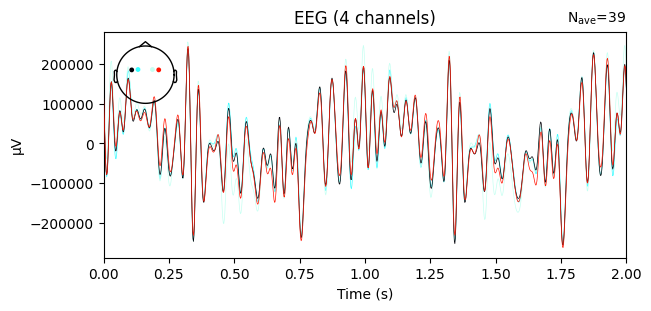

<Evoked | 'hook' (average, N=39), 0 – 2 s, baseline off, 4 ch, ~43 kB>


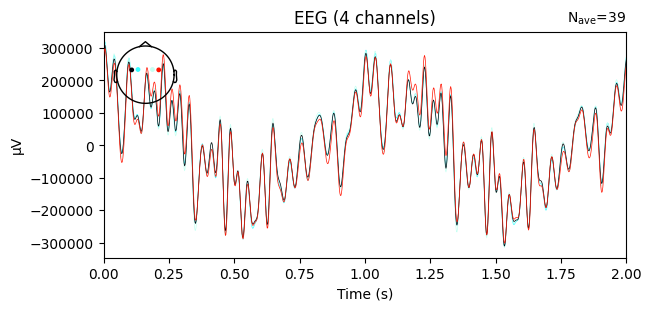

<Evoked | 'index' (average, N=39), 0 – 2 s, baseline off, 4 ch, ~43 kB>


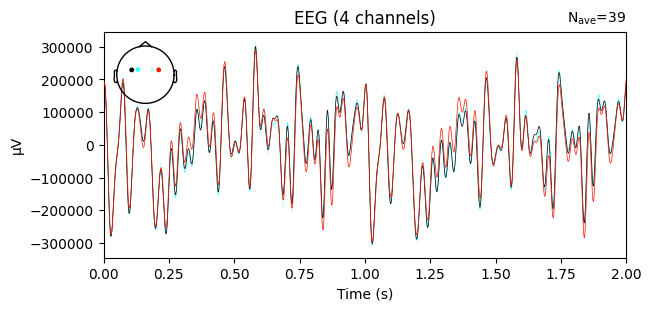

<Evoked | 'open' (average, N=39), 0 – 2 s, baseline off, 4 ch, ~43 kB>


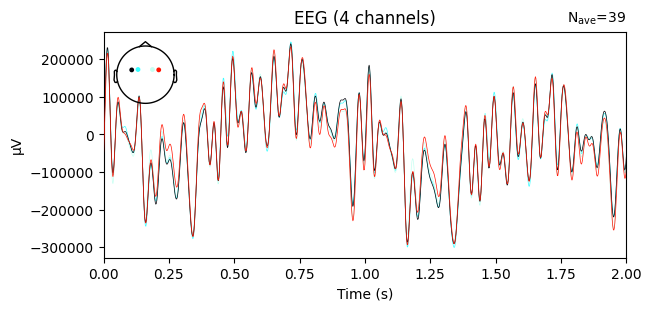

<Evoked | 'thumb' (average, N=39), 0 – 2 s, baseline off, 4 ch, ~43 kB>


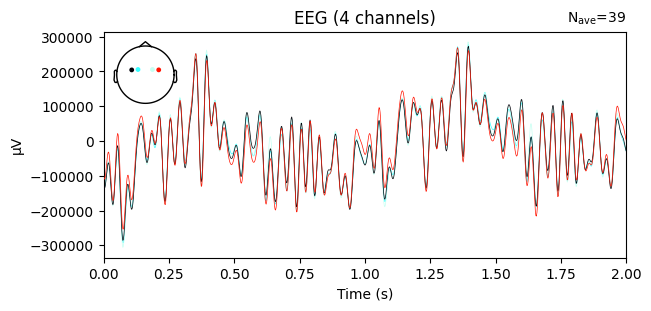

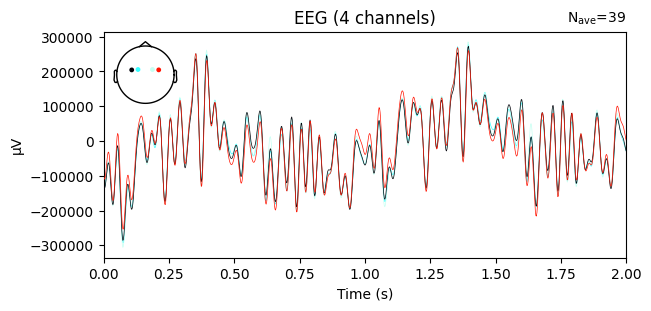

In [10]:
evoked = epochs['fist'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['hook'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['index'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['open'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['thumb'].average()
print(evoked)
evoked.plot(time_unit='s')

In [11]:
labels = epochs.events[:,-1]
data = epochs.get_data()
print(data.shape, labels.shape)

(195, 4, 1001) (195,)


C:\Users\Dhiyaa Amalia\AppData\Local\Temp\ipykernel_17116\830222235.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [12]:
import pywt

# signal is decomposed to level 5 with 'db4' wavelet

def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],38)) 
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)
print(wpd_data.shape)

(8, 195, 4, 38)


In [13]:
from mne.decoding import CSP 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()
print(X_out)

# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
print(cv)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

In [16]:
#using SVM dengan kernel rbf

import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from mne.decoding import CSP
from sklearn.model_selection import GridSearchCV, train_test_split

data_comb = [wpd_data[i] for i in range(wpd_data.shape[0])]
labels_copy = labels.copy()

indices = [i for i in range(data_comb[0].shape[0])]

indices_train, indices_test = train_test_split(indices, test_size=0.2)
data_comb_train  = [data_comb[i][indices_train] for i in range(len(data_comb))]
data_comb_test = [data_comb[i][indices_test] for i in range(len(data_comb))]

wpd_data = np.asarray(data_comb_train)
test_data = np.asarray(data_comb_test)
labels = labels_copy[indices_train]
test_labels = labels_copy[indices_test]



svms = []
Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
Csp = [Csp[x].fit(wpd_data[x,...], labels) for x  in range(8)]
ss = preprocessing.StandardScaler()
ss = ss.fit(np.concatenate(tuple(Csp[x].transform(wpd_data[x, ...]) for x  in range(8)), axis=-1))

acc = []
ka = []
prec = []
recall = []

param_grid = {
    'C': [0.1, 1, 1.5, 0.9], 
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf']  
}

# Inisialisasi StratifiedKFold
cv = StratifiedKFold(n_splits=10)

for train_idx, test_idx in cv.split(labels, labels):
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    
    # Ekstraksi fitur menggunakan CSP dan StandardScaler
    X_train = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x, train_idx, :, :]) for x in range(8)), axis=-1))
    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(test_data[x, ...]) for x in range(8)), axis=-1))
    
    # Inisialisasi model SVM
    svm = SVC(probability=True)
    
    # Inisialisasi GridSearchCV dengan SVM dan parameter grid
    grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
    
    # Fit GridSearchCV pada data training
    grid_search.fit(X_train, label_train)

    best_svm = grid_search.best_estimator_
        
    svms.append(best_svm)
    
    # Predict pada data testing
    y_pred = grid_search.predict(X_test)
    y_prob = grid_search.predict_proba(X_test)
    
    # Hitung dan simpan metrik evaluasi
    acc.append(accuracy_score(test_labels, y_pred))
    ka.append(cohen_kappa_score(test_labels, y_pred))
    prec.append(precision_score(test_labels, y_pred, average='weighted'))
    recall.append(recall_score(test_labels, y_pred, average='weighted'))


Computing rank from data with rank=None
    Using tolerance 0.2 (2.2e-16 eps * 4 dim * 2.2e+14  max singular value)
    Estimated rank (data): 4
    data: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.18 (2.2e-16 eps * 4 dim * 2e+14  max singular value)
    Estimated rank (data): 4
    data: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Done.

In [17]:
from collections import Counter
print(Counter(labels))

Counter({4: 35, 5: 33, 3: 31, 2: 29, 1: 28})


In [18]:
print(np.unique(labels))

[1 2 3 4 5]


In [19]:
import pandas as pd

scores = {'Accuracy':acc,'Kappa':ka,'Precision':prec,'Recall':recall}

Es = pd.DataFrame(scores)
avg = {'Accuracy':[np.mean(acc)],'Kappa':[np.mean(ka)],'Precision':[np.mean(prec)],'Recall':[np.mean(recall)]}
Avg = pd.DataFrame(avg)

T = pd.concat([Es,Avg])

T.index = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Avg']
T.index.rename('Fold',inplace=True)

print(T)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.846154  0.803691   0.847863  0.846154
F2    0.871795  0.835859   0.873504  0.871795
F3    0.871795  0.836683   0.881481  0.871795
F4    0.846154  0.803691   0.847863  0.846154
F5    0.871795  0.836134   0.876923  0.871795
F6    0.846154  0.803691   0.847863  0.846154
F7    0.871795  0.836134   0.876923  0.871795
F8    0.897436  0.869128   0.905413  0.897436
F9    0.923077  0.901015   0.938462  0.923077
F10   0.846154  0.803691   0.847863  0.846154
Avg   0.869231  0.832972   0.874416  0.869231


In [20]:
import joblib  

for idx, svm in enumerate(svms):
    joblib.dump(svm, f'svm_{idx}.pkl')  

for idx, csp in enumerate(Csp):
    joblib.dump(csp, f'csp_{idx}.pkl')  

joblib.dump(ss, 'scaler.pkl')  


['scaler.pkl']

In [21]:
def inference(new_data, Csp_list, ss, svms):

    # Transformasi data dengan CSP untuk setiap band
    transformed_data = np.concatenate(
        tuple(Csp_list[i].transform(new_data[i, :, :]) for i in range(8)), axis=-1
    )

    # Scaling dengan StandardScaler
    scaled_data = ss.transform(transformed_data)

    # Menghitung probabilitas prediksi dari setiap SVM
    prob_sum = np.zeros((scaled_data.shape[0], len(svms[0].classes_)))
    for i, svm in enumerate(svms):
        prob_sum += svm.predict_proba(scaled_data)

    # Kelas dengan probabilitas tertinggi
    predicted_class_idx = np.argmax(prob_sum, axis=1)
    
    # Definisikan label kelas
    classes = ['fist', 'hook', 'index', 'open', 'thumb']
    
    # Return hasil prediksi kelas
    return [classes[class_idx] for class_idx in predicted_class_idx]


In [22]:
import time 
start_time = time.time()
result = inference(test_data, Csp, ss, svms)

elapsed_time=time.time () - start_time
elapsed_time

0.011998891830444336

In [23]:
result

['thumb',
 'hook',
 'index',
 'index',
 'open',
 'fist',
 'open',
 'open',
 'hook',
 'hook',
 'index',
 'thumb',
 'fist',
 'hook',
 'fist',
 'thumb',
 'fist',
 'thumb',
 'index',
 'fist',
 'index',
 'open',
 'hook',
 'fist',
 'fist',
 'index',
 'fist',
 'fist',
 'fist',
 'index',
 'index',
 'index',
 'fist',
 'index',
 'hook',
 'hook',
 'open',
 'hook',
 'thumb']